**Main Idea - Overview**

---
The source images are inside 5 seperate folders which are named in their own category name(eg:'image data directory/Acne').At the start imported the necessary libraries that are required inorder to load the dataset and do preprocess and EDA(Exploratory Data Analysis).

Atstart we mounted the google drive to the google colab inorder to access the image folders.

As the next step we created a blank list called "data" to store all the images belongs all the categories(eg:'image data directory/Acne').We used a loop to access all 5 different folders which has the images belong to certain category.While accessing images one by one we resized the image into 250* 250 size.And converted the image to 2D and converted to a numpy array.Then stored the image with it's category inside the "data" list.We did the same process for all the images to store it inside "data" list.Then saved the "data" list as "data2.pickle" file using pickle library.that file contained data about image features (eg:[234,2,3] an integer array) of the images and the label name of the image(eg:Acne).

Then as the next step we needed to split the dataset into training ,testing and then Build the models.Before that we imported necessary libraries.
Then we loaded the "data2.pickle" which we stored earlier as "loaded data" name.As the next step we extracted the 'features' from "loaded data" list into a newly created blank list called "features" and extracted the respective 'label'of the image from "loaded data" into a newly created blank list called "labels".Now finally we have 2 list which are one of them containing 'features'[independent column] of the images and other one contains their respective 'labels'[dependent target column ].

So then we balance the dataset using a Data balancing technique.We used SMOTEENN technique which is a combination of undersampling and oversampling.

Now we have the balanced dataset.Then we split the dataset into training and testing.
Finally we send the training data to train the models such as KNN,SVM and Random forest models.Then we predict an image's category by pasing the image as the testing data and visually represents the affected area of the skin in the image using saliency map.











**we uploaded the images of each categories into a seperate folder and uploaded it to the personal google drive.each folder has the name of each category.Then we mounted the google drive first using drive library available under google.colab.**

At the start we mounted the google drive to the google colab inorder to 
access the image folders.

**mount the drive**

In [1]:
# Import the necessary libraries
from google.colab import drive

# Mount the Google Drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


Below **data_dir** folder contains the all 5 subfolders which has the images of their **respective** categories

In [2]:
data_dir="/content/MyDrive/MyDrive/Sample data"

**imported the necessary libraries that are required inorder to load the dataset and do preprocess and EDA(Exploratory Data Analysis).**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pandas as pd

**created a dictionary to include the category name of each disease.we used the exact subfolder names as the keys in the dictionary to access it easily through the loop below.ANd we assigned 0 to 4 as the value for respective categories**

In [4]:
from google.colab.patches import cv2_imshow
disease_labels_dict = {
    'Acne': 0,
    'Cyst, tumour and skin-tags': 1,
    'Melanoma': 2,
    'Monkeypox': 3,
    'Normal skin': 4,
}

**created a blank list called "data" to store all the images belong to all the categories in subfolders(eg:'data_dir/category').We used a loop to access all 5 different folders which has the images belong to certain category.And did some preprocessing like resizing images to 250 * 250 size.And converting to 2d format**

In [5]:
#initialize a blank list to fill image features and labels(categories)
data=[]
#categories of each images
categories=["Acne","Cyst, tumour and skin-tags","Melanoma","Monkeypox","Normal skin"]
for category in categories:
  # access the path of subfolder (eg:'data_dir/Acne')
  path=os.path.join(data_dir,category)

  for img in os.listdir(path):
    #access the partcular image in that above mentioned subfolder(eg:data_dir/Acne/Acne(2).jpg')
    imgpath=os.path.join(path,img)
    image=cv2.imread(imgpath,0)
    #resize the image
    image=cv2.resize(image,(250,250))
    #convert the image to numpy array inorder to flatten
    image=np.array(image).flatten()
    #store the image feauture and image label inside "data" list
    data.append([image,disease_labels_dict[category]])

**Then saved the "data" list as "data2.pickle" file using pickle library.that file contained data about image features (eg:[234,2,3] an integer array) of the images and the label name of the image(eg:Acne).**

In [6]:
import pickle
#write a pickle file and save the 'data' list
pick_in=open('data2.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

**Loaded the saved 'data2.pickle' file which contained image features,and image labels as "loaded_data".And imported some required libraries for the balancing the dataset , splitting the dataset into training ,testing And for the model bulding**

In [7]:
import random 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#load the saved pickle file which contains the dataset
loaded_data = pickle.load(open('data2.pickle', 'rb'))

In [8]:
#imported the SMOTEENN library which is required to do balancing the dataset (this is a combination of oversampling and undersampling technique)
from imblearn.combine import SMOTEENN
#shuffled the dataset
random.shuffle(loaded_data)
#created blank list to store feautures and labels respectively
features=[]
labels=[]

#store features and labels of all images respectively in above 2 lists(features,labels)
for feature,label in loaded_data:
  features.append(feature)
  labels.append(label)







In [9]:
df_labels = pd.DataFrame(labels, columns=['labels'])
df_features = pd.DataFrame(labels, columns=['features'])

**Checking the balance**

Text(0.5, 1.0, 'label column')

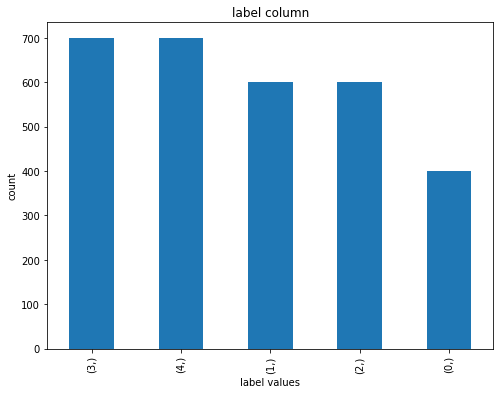

In [10]:
# checking how many churn and non churned customes are there
df_labels.value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel("label values")
plt.ylabel("count")
plt.title("label column")

In [11]:
df_labels.isnull().sum()

labels    0
dtype: int64

Text(0.5, 1.0, 'label column')

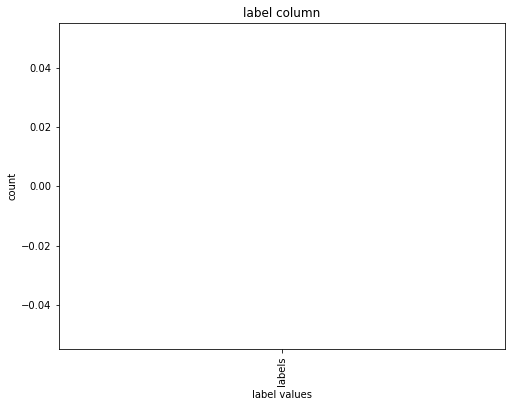

In [12]:
# checking how many churn and non churned customes are there
df_labels.isnull().sum().plot(kind='bar',figsize=(8,6))
plt.xlabel("label values")
plt.ylabel("count")
plt.title("label column")

In [13]:
df_features.isnull().sum()

features    0
dtype: int64

Text(0.5, 1.0, 'feature column')

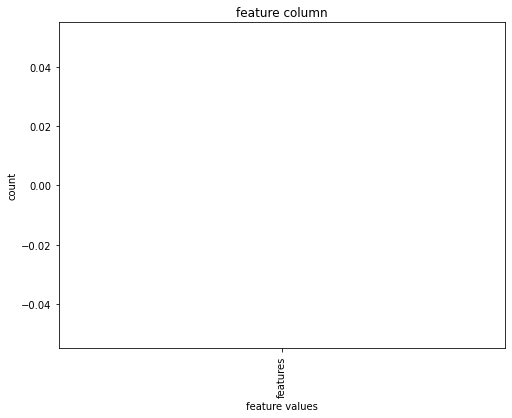

In [14]:
# checking how many churn and non churned customes are there
df_features.isnull().sum().plot(kind='bar',figsize=(8,6))
plt.xlabel("feature values")
plt.ylabel("count")
plt.title("feature column")

**Splitting the dataset before rebalacing.this is used for showing that model accuracy is low when we use these imbalanced dataset**

In [15]:
# Split the data into training and test sets
X_imbalanced_train, X_imbalanced_test, y_imbalanced_train, y_imbalanced_test = train_test_split(features, labels, test_size=0.2)

# **Balancing the dataset**

**SMOTEENN**

In [16]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
#from imblearn.over_sampling import SMOTE
#sm=SMOTE()
#balanced dataset
X_resampled, y_resampled = sm.fit_resample(features,labels)

**Splitting the Dataset into training and testing AFTER balancing**

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# **Creating a Support Vector Machine Model using the preprocessed and splitted Dataset**

**using imbalanced dataset**

In [18]:
#created a Support vector machine model
model=SVC(C=1,kernel='poly',gamma='auto')
#fitting the model using training data
model.fit(X_imbalanced_train,y_imbalanced_train)
# predict the label(categories) of all the testing images
prediction=model.predict(X_imbalanced_test)
#accuracy of the model
accuracy=model.score(X_imbalanced_test,y_imbalanced_test)
print("Accuracy:",accuracy)

Accuracy: 0.5216666666666666


**using balanced dataset**

Accuracy: 0.9263803680981595
prediction is : Cyst, tumour and skin-tags


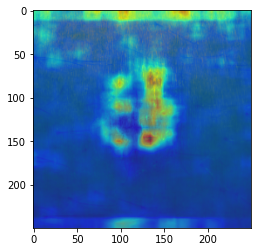

In [ ]:
#created a Support vector machine model
model=SVC(C=1,kernel='poly',gamma='auto')
#fitting the model using training data
model.fit(X_train,y_train)
# predict the label(categories) of all the testing images
prediction=model.predict(X_test)
#accuracy of the model
accuracy=model.score(X_test,y_test)

#saving created model inside pickle as 'model.sav'
pick=open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

categories=["Acne","Cyst, tumour and skin-tags","Melanoma","Monkeypox","Normal skin"]

print("Accuracy:",accuracy)
#here u can change the image u are testing by changing the number inside the prediction[ ] function(here it is 54th image)
print("prediction is :",categories[prediction[54]])

#image of a particular testing image(here it is 54th image)
image=X_test[54]

# reshape the testing image
image=np.array(image).reshape(250,250)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)
# Calculate the saliency map using the OpenCV saliency module
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

success, saliency_map = saliency.computeSaliency(image)

# Normalize the saliency map

saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
plt.imshow(saliency_map,cmap='jet',alpha=0.5)


plt.show()

# **Random Forest Model**

**using imbalanced dataset**

In [23]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_imbalanced_train,y_imbalanced_train)

# predict the label(categories) of all the testing images
prediction=clf.predict(X_imbalanced_test)
accuracy=clf.score(X_imbalanced_test,y_imbalanced_test)
print("Accuracy:",accuracy)

Accuracy: 0.5983333333333334


**using balanced dataset**

Accuracy: 0.9079754601226994
prediction is : Cyst, tumour and skin-tags


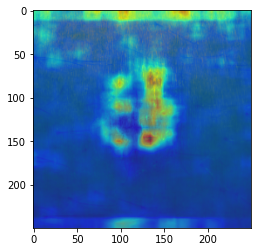

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# predict the label(categories) of all the testing images
prediction=clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

categories=["Acne","Cyst, tumour and skin-tags","Melanoma","Monkeypox","Normal skin"]

#accuracy
print("Accuracy:",accuracy)

#here u can change the image u are testing by changing the number inside the prediction[ ] function(here it is 54th image)

print("prediction is :",categories[prediction[54]])

#visually represents the testing image(here it is 54th image)
image=X_test[54]
# reshape the testing image
image=np.array(image).reshape(250,250)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)
# Calculate the saliency map using the OpenCV saliency module
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

success, saliency_map = saliency.computeSaliency(image)

# Normalize the saliency map

saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
plt.imshow(saliency_map,cmap='jet',alpha=0.5)


plt.show()

# **K Nearest Neighbour**

**using imbalanced dataset**

In [24]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
clf1 = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf1.fit(X_imbalanced_train,y_imbalanced_train)

prediction=clf1.predict(X_imbalanced_test)
accuracy=clf1.score(X_imbalanced_test,y_imbalanced_test)
print("Accuracy:",accuracy)

Accuracy: 0.43666666666666665


**Using balanced dataset**

Accuracy: 0.8466257668711656
prediction is : Cyst, tumour and skin-tags


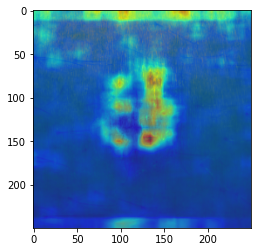

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
clf1 = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf1.fit(X_train, y_train)

prediction=clf1.predict(X_test)
accuracy=clf1.score(X_test,y_test)

categories=["Acne","Cyst, tumour and skin-tags","Melanoma","Monkeypox","Normal skin"]

print("Accuracy:",accuracy)
print("prediction is :",categories[prediction[54]])
image=X_test[54]
image=np.array(image).reshape(250,250)
#plt.imshow(image,cmap='copper')

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)
# Calculate the saliency map using the OpenCV saliency module
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

success, saliency_map = saliency.computeSaliency(image)

# Normalize the saliency map

saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
plt.imshow(saliency_map,cmap='jet',alpha=0.5)


plt.show()